<a href="https://colab.research.google.com/github/suvarnak/Analytics-Playground/blob/master/ConvolutionalAutoencoders_XferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/suvarnak/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 22537, done.
remote: Total 22537 (delta 0), reused 0 (delta 0), pack-reused 22537
Receiving objects: 100% (22537/22537), 657.36 MiB | 14.77 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (22522/22522), done.


In [0]:
# call for pre data for cats-dogs
train_dir="datasets/cats_and_dogs/train/dogs/"
test_dir="datasets/cats_and_dogs/test/dogs/"
validation_dir="datasets/cats_and_dogs/valid/dogs/"

In [3]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np,os
import skimage.io as io
from skimage.transform import resize

def prepareInputFromImageFolder(path) :
  all_images = []
  for image_path in os.listdir(path):
    img = io.imread(path+image_path)
    img = resize(img,(148, 148))
    all_images.append(img)
  return np.array(all_images)


path= test_dir; #train_dir
print(path)  
x_train = prepareInputFromImageFolder(path)
print(x_train.shape)   


datasets/cats_and_dogs/test/dogs/


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(500, 148, 148, 3)


In [4]:
# normalize

import numpy as np
print(np.max(x_train)) # should be 255
x_train = x_train / np.max(x_train)

print(np.max(x_train))

1.0
1.0


In [0]:
# train test split
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(x_train,
                                                             x_train, 
                                                             test_size=0.2, 
                                                             random_state=13)

In [6]:
# define architectur of conv. neural network
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop

batch_size = 128
epochs = 20
inChannel = 3
x, y = 148, 148
input_img = Input(shape = (x, y, inChannel))

def autoencoder(input_img):
    #encoder
    #input = 150 x 150 x 3 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #150 x 150 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) 
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #75 x 75 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) 
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #36 x 36x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded
  
autoencoder_dog = Model(input_img, autoencoder(input_img))
autoencoder_dog.compile(loss='mean_squared_error', optimizer = RMSprop())

Using TensorFlow backend.


In [7]:
autoencoder_train_dog = autoencoder_dog.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))


Train on 400 samples, validate on 100 samples
Epoch 1/20
400/400 [==============================] - 12s 31ms/step - loss: 0.0709 - val_loss: 0.0531
Epoch 2/20
400/400 [==============================] - 2s 6ms/step - loss: 0.1172 - val_loss: 0.0520
Epoch 3/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0452 - val_loss: 0.0868
Epoch 4/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0583 - val_loss: 0.0378
Epoch 5/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0355 - val_loss: 0.0367
Epoch 6/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0398 - val_loss: 0.0255
Epoch 7/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0262 - val_loss: 0.0529
Epoch 8/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0407 - val_loss: 0.0224
Epoch 9/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0345 - val_loss: 0.0227
Epoch 10/20
400/400 [==============================]

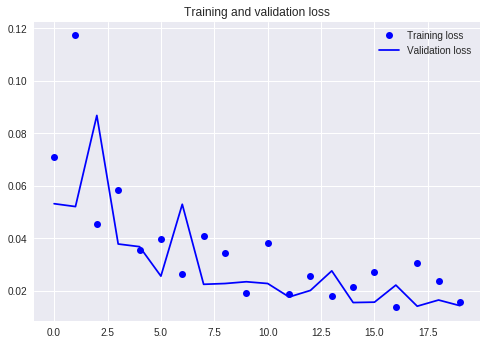

In [8]:
loss = autoencoder_train_dog.history['loss']
val_loss = autoencoder_train_dog.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# call for pre data for cats-dogs
train_dir_cats="datasets/cats_and_dogs/train/cats/"
test_dir_cats="datasets/cats_and_dogs/test/cats/"
validation_dir_cats="datasets/cats_and_dogs/valid/cats/"

In [10]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np,os
import skimage.io as io
from skimage.transform import resize

def prepareInputFromImageFolder(path) :
  all_images = []
  for image_path in os.listdir(path):
    img = io.imread(path+image_path)
    img = resize(img,(148, 148))
    all_images.append(img)
  return np.array(all_images)


path= test_dir_cats; #train_dir
print(path)  
x_train_cats = prepareInputFromImageFolder(path)
print(x_train_cats.shape)   


datasets/cats_and_dogs/test/cats/


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(500, 148, 148, 3)


In [11]:
# normalize

import numpy as np
print(np.max(x_train_cats), np.max(x_train_cats)) # should be 255
x_train_cats = x_train_cats / np.max(x_train_cats)

print(np.max(x_train_cats))

1.0 1.0
1.0


In [0]:
# train test split
from sklearn.model_selection import train_test_split
train_X_cats,valid_X_cats,train_ground_cats,valid_ground_cats = train_test_split(x_train_cats,
                                                             x_train_cats, 
                                                             test_size=0.2, 
                                                             random_state=13)

In [13]:
batch_size = 128
epochs = 20
inChannel = 3
x, y = 148, 148
input_img = Input(shape = (x, y, inChannel))

autoencoder_cat = Model(input_img, autoencoder(input_img))
autoencoder_cat.compile(loss='mean_squared_error', optimizer = RMSprop())
autoencoder_train_cat = autoencoder_cat.fit(train_X_cats, train_ground_cats, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X_cats, valid_ground_cats))


Train on 400 samples, validate on 100 samples
Epoch 1/20
400/400 [==============================] - 3s 7ms/step - loss: 0.0858 - val_loss: 0.0642
Epoch 2/20
400/400 [==============================] - 2s 6ms/step - loss: 0.1129 - val_loss: 0.0616
Epoch 3/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0744 - val_loss: 0.0557
Epoch 4/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0509 - val_loss: 0.1492
Epoch 5/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0734 - val_loss: 0.0258
Epoch 6/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0278 - val_loss: 0.0393
Epoch 7/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0322 - val_loss: 0.0284
Epoch 8/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0330 - val_loss: 0.0196
Epoch 9/20
400/400 [==============================] - 2s 6ms/step - loss: 0.0256 - val_loss: 0.0249
Epoch 10/20
400/400 [==============================] -

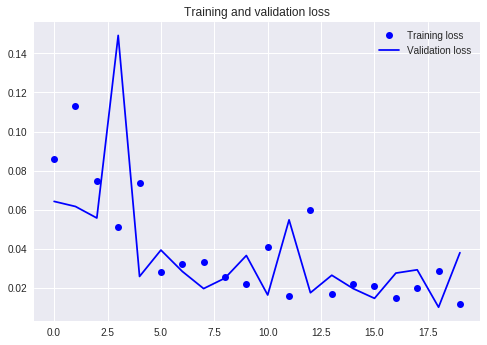

In [14]:
loss = autoencoder_train_cat.history['loss']
val_loss = autoencoder_train_cat.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
path= 'datasets/cats_and_dogs/test/bears/';
print(path)  
x_test = prepareInputFromImageFolder(path)
print(x_test.shape)


datasets/cats_and_dogs/test/bears/


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(500, 148, 148, 3)


In [0]:
pred_dog = autoencoder_cat.predict(x_test)
pred_cat = autoencoder_dog.predict(x_test)

test_labels = ['bear']
label_dict = {
 0: 'Bear',
}

Test Images


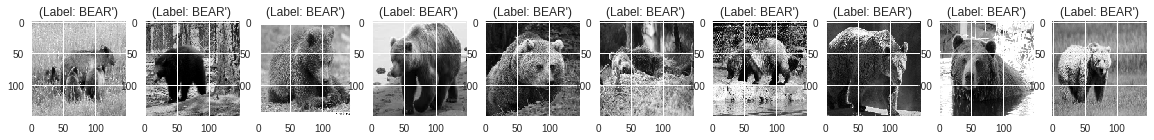

Reconstruction of Test Images with CAT model


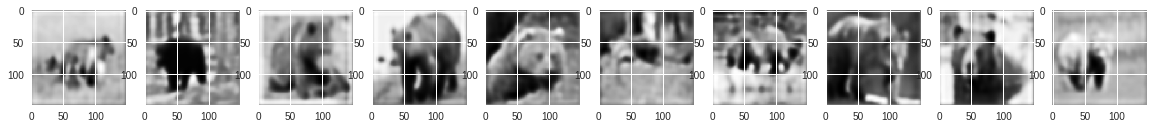

Reconstruction of Test Images with DOG model


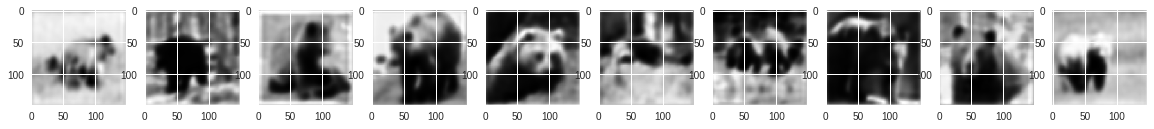

In [17]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i, ..., 0], cmap='gray')
    curr_lbl ='BEAR'
    plt.title("(Label: BEAR')")
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images with CAT model")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred_cat[i, ..., 0], cmap='gray')  
plt.show()
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images with DOG model")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred_dog[i, ..., 0], cmap='gray')  
plt.show()


In [0]:

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

MSE 1 0.16469908020702723
MSE 2 0.040062996070290985
MSE 1 0.14161774478137312
MSE 2 0.05216295643656935
MSE 1 0.19810220322083544
MSE 2 0.05686359788596862


ValueError: ignored

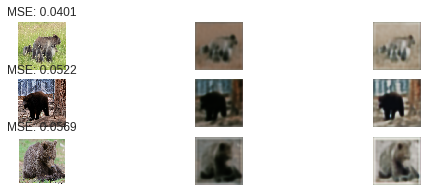

In [19]:
# encode and decode some digits
# note that we take them from the *test* set
decoded_imgs_cat = autoencoder_cat.predict(x_test)
decoded_imgs_dog = autoencoder_dog.predict(x_test)

n = 5 # how many digits we will display
plt.figure(figsize=(9, 3))
count =1
for i in range(n):
    # display original
    sub1 = plt.subplot(3, 3, count)
    count=count+1
    imageA = x_test[i]
    plt.imshow(imageA)    
    plt.gray()
    sub1.get_xaxis().set_visible(False)
    sub1.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(3, 3, count)
    count=count+1
    imageB = decoded_imgs_cat[i]
    plt.imshow(imageB)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    m = mse(imageA, imageB)
    sub1.set_title("MSE: %.4f" % (m))
    print("MSE 1" ,m)
    
    # display reconstruction
    ax = plt.subplot(3, 3, count)
    count=count+1
    imageB = decoded_imgs_dog[i]
    plt.imshow(imageB)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    m = mse(imageA, imageB)
    sub1.set_title("MSE: %.4f" % (m))
    print("MSE 2" ,m)
plt.show()

In [0]:
decoded_imgs_cat_model = autoencoder_cat.predict(x_test)
decoded_imgs_dog_model = autoencoder_dog.predict(x_test)

mse_dog = list()
mse_cat = []
for i in range(500):
    imageA = x_test[i]
    imageB = decoded_imgs_cat_model[i]
    mse_cat.append(mse(imageA, imageB))
    imageC = decoded_imgs_dog_model[i]
    imageA = x_test[i]
    mse_dog.append(mse(imageA, imageC))

    

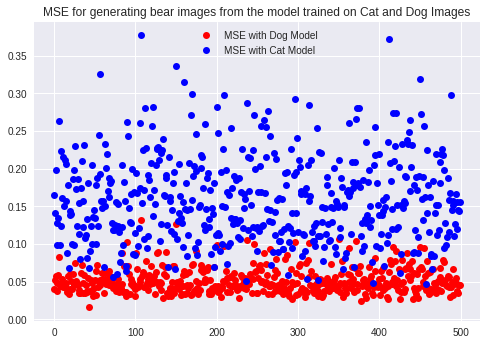

In [27]:
num_of_images = range(500)
plt.figure()
plt.plot(num_of_images, mse_dog, 'ro', label='MSE with Dog Model')
plt.plot(num_of_images, mse_cat, 'bo', label='MSE with Cat Model')
plt.title('MSE for generating bear images from the model trained on Cat and Dog Images')
plt.legend()
plt.show()
